# Fish 


Task:
1. Observe the probability of 30 fishes to be 500lbs or less
2. ''
3. ''


In [8]:
from helper_functions import choose_statistic, population_distribution, sampling_distribution
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## `Data inspection and cleaning`

In [9]:
fish_df = pd.read_csv('Fish.csv')
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [10]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [11]:
fish_df.describe(include='all')

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN
top,Perch,NaN,NaN,NaN,NaN,NaN,NaN
freq,56,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,NaN,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,NaN,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,NaN,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,NaN,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,NaN,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500


## `Let's Focus on weight`

In [12]:
fish_df_weight = fish_df['Weight']
fish_df_weight

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

## ` Check and remove zero weight fish (outliers)`

In [13]:
fish_df_weight_zero = fish_df[fish_df.Weight == 0]
fish_df_weight_zero

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [14]:
fish_df_weight_clean = fish_df[fish_df.Weight > 0] 
fish_df_weight_clean = fish_df_weight_clean.Weight
fish_df_weight_clean

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 158, dtype: float64

In [15]:
fish_df_weight_clean.shape

(158,)

## `Now our dataframe is clean, we can move on our analyzation`

### `Ploting the population distribution (with the help of our function helper)`

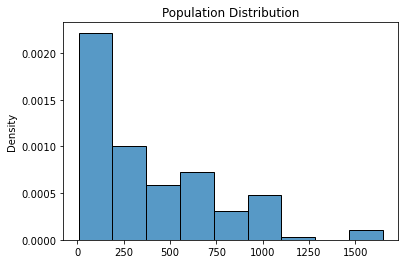

<Figure size 432x288 with 0 Axes>

In [16]:
population_distribution(fish_df_weight_clean)

### `Looks like our fish_df_weight_clean is heavily skewed to the right`

`We will retrieve 30 fishes from this population as our sample and plot it to histogram`

In [17]:

sample_size = 30

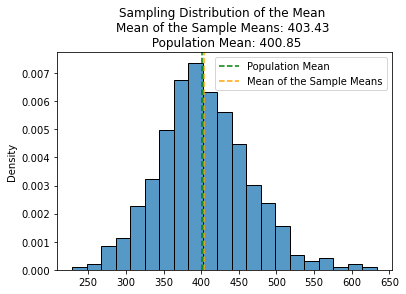

<Figure size 432x288 with 0 Axes>

In [18]:
sampling_distribution(fish_df_weight_clean, sample_size, 'Mean' )

## `Observing 30 fishes to be 500lbs or less`

In [65]:
fish_df_weight_clean_std = np.std(fish_df_weight_clean)
fish_df_weight_clean_std

356.5640437617306

In [64]:
fish_df_weight_clean_mean = np.mean(fish_df_weight_clean)
fish_df_weight_clean_mean

400.84746835443036

In [63]:
stats.norm.cdf(500, fish_df_weight_clean_mean, fish_df_weight_clean_std)

0.6095236673163115

## ' There is 61% probability that 30 fishes are 500lbs or less.

## `Now let's say we dont know the true std of the total (orignal) population of fishes`

`We will use the STD of our sample(30 fishes) to get a standard error then we can now calculate for the estimated_standard_error `

In [95]:
sample_data_30_fish = np.random.choice(fish_df_weight_clean, sample_size, replace=False)
# sample_data_30_fish

In [96]:
standard_error = np.std(sample_data_30_fish) / sample_size ** .5
standard_error

75.23508881179391

`Note: 1.96 is constant and best practice (It is based on STD of normal distribution pls check lesson for reference) `

In [97]:
estimated_standard_error = standard_error * 1.96
estimated_standard_error

147.46077407111608

In [98]:
stats.norm.cdf(500, fish_df_weight_clean_mean, estimated_standard_error)

0.7493352582470905

### ' There is 75% probability that 30 fishes are 500lbs or less.

## Work in Progress... ;)
Note: This is for review and checking.. 
